In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow_datasets as tfds

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
data,info = tfds.load('horses_or_humans', split='train+test', shuffle_files=True, with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...:  20%|█████████████▋                                                     | 31/152 [00:24<01:43,  1.17 MiB/s]


Dl Size...:  42%|████████████████████████████▏                                      | 64/152 [00:54<02:01,  1.38s/ MiB]


Dl Size...:  64%|██████████████████████████████████████████▊                        | 97/152 [01:18<01:21,  1.48s/ MiB]


Dl Size...:  86%|████████████████████████████████████████████████████████▍         | 130/152 [02:52<03:46, 10.29s/ MiB]


Generating splits...:   0%|                                                                 | 0/2 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 47 examples [00:00, 459.29 examples/s]
Generating train examples...: 115 examples [00:00, 584.99 examples/s]
Generating train examples...: 188 examples [00:00, 643.67 examples/s]
Generating train examples...: 264 examples [00:00, 674.51 examples/s]
Generating train examples...: 339 examples [00:00, 698.96 examples/s]
Generating train examples...: 422 examples [00:00, 718.63 examples/s]
Generating train examples...: 494 examples [00:00, 713.82 examples/s]
Generating train examples...: 568 examples [00:00, 721.43 examples/s]
Generating train examples...: 641 examples [00:00, 702.85 examples/s]
Generating train examples...: 715 examples [00:01, 709.98 examples/s]
Generating train examples...: 787 examples [00:01, 662.85 examples/s]
Generating train examples...: 854 examples [00:0

Dataset horses_or_humans downloaded and prepared to C:\Users\user\tensorflow_datasets\horses_or_humans\3.0.0. Subsequent calls will reuse this data.


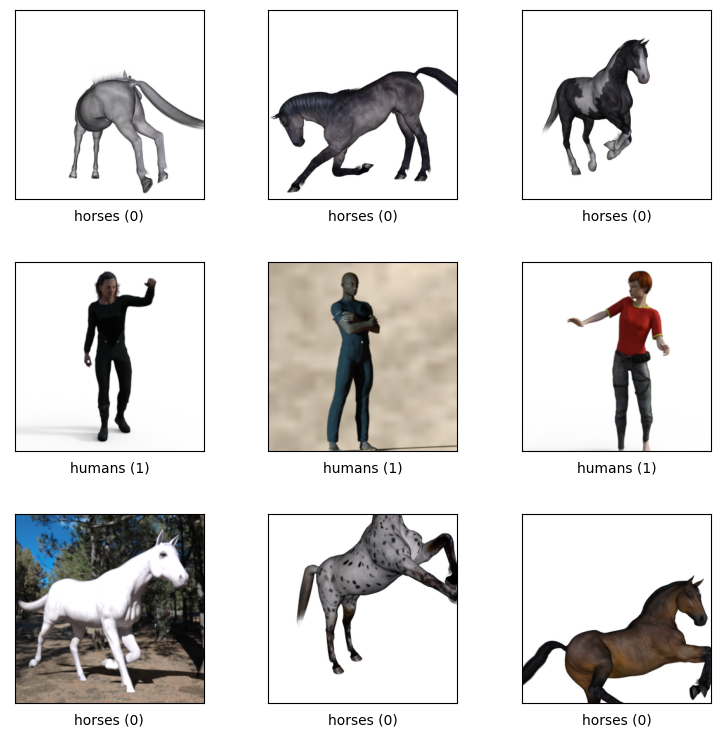

In [8]:
vis = tfds.visualization.show_examples(data,info)

In [9]:
def resize(image,label):
  image = tf.image.resize(image,[224,224])
  return (image,label)

data = data.map(resize)

In [10]:
data = data.map(lambda x,y: (x / 255,y))

In [11]:
data = data.shuffle(len(data))

In [12]:
data = data.batch(32)

In [13]:
def one_hot(image, label):
    label = tf.one_hot(tf.cast(label, tf.int32), 3)
    # Recasts it to Float32
    label = tf.cast(label, tf.float32)
    return image, label

data = data.map(one_hot)

In [14]:
my_model = tf.keras.models.Sequential(layers = [
                                     tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D((4,4)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Dense(256,activation='relu'),
                                     tf.keras.layers.Dense(3,activation='softmax')
],
name='ConvModel')

# Using the Categorical loss, and ADAM Optimizer
my_model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

Epoch 1/10
41/41 [==============================] - 55s 1s/step - loss: 0.4284 - accuracy: 0.9119
Epoch 2/10
41/41 [==============================] - 53s 1s/step - loss: 0.4216 - accuracy: 0.9228
Epoch 3/10
41/41 [==============================] - 52s 1s/step - loss: 0.1165 - accuracy: 0.9743
Epoch 4/10
41/41 [==============================] - 52s 1s/step - loss: 0.0965 - accuracy: 0.9790
Epoch 5/10
41/41 [==============================] - 52s 1s/step - loss: 0.0229 - accuracy: 0.9922
Epoch 6/10
41/41 [==============================] - 52s 1s/step - loss: 0.0687 - accuracy: 0.9852
Epoch 7/10
41/41 [==============================] - 56s 1s/step - loss: 0.1444 - accuracy: 0.9766
Epoch 8/10
41/41 [==============================] - 56s 1s/step - loss: 0.1122 - accuracy: 0.9844
Epoch 9/10
41/41 [==============================] - 56s 1s/step - loss: 0.1683 - accuracy: 0.9634
Epoch 10/10
41/41 [==============================] - 56s 1s/step - loss: 0.0568 - accuracy: 0.9883


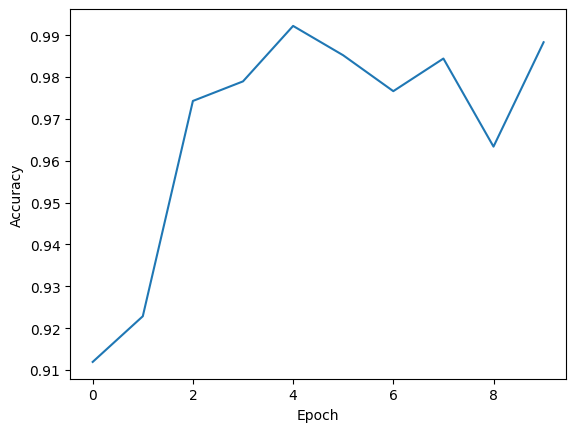

In [15]:
History = my_model.fit(data,epochs=10)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
alpha = plt.plot(History.history['accuracy'])